In this notebook, we will try to detect a coin from an image using dlib. Let's import necessary modules

In [10]:
import glob, os, dlib
import pandas as pd
import ntpath
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
import cv2
%matplotlib inline

I've selected 15 images randomly and annotated them using Imglab. That annotation file can be found here https://gist.github.com/qmaruf/f6740ff448dfcea5227fb0f8f4cad0c5

In [2]:
# annotation images and xml file
annotation_folder = '/media/maruf/resource2/kaggle/brazilian_coin/annotations/'
# rest of the images for testing
coins = glob.glob('/media/maruf/resource2/kaggle/brazilian_coin/all/*.jpg')

In [3]:
# necessary settings for dlib, taken from dlib site.
options = dlib.simple_object_detector_training_options()
options.add_left_right_image_flips = True
options.C = 5
options.num_threads = 4
options.be_verbose = True
training_xml_path = os.path.join(annotation_folder, "training.xml")

In [4]:
# training
dlib.train_simple_object_detector(training_xml_path, "detector.svm", options)
# loading detector
detector = dlib.simple_object_detector("detector.svm")

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154436.jpg


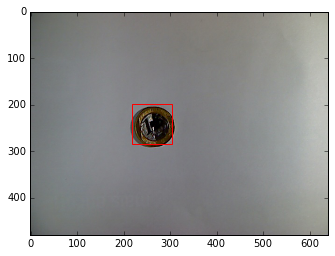

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154442.jpg


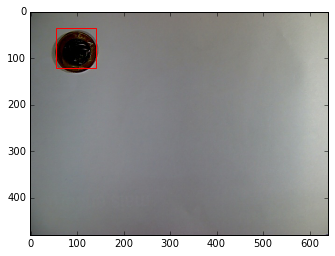

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154448.jpg


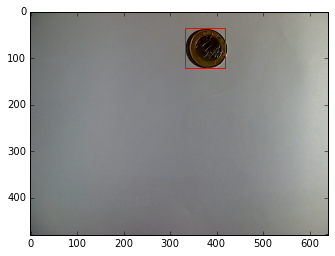

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154454.jpg


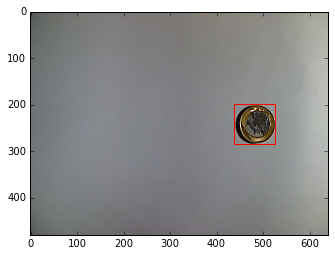

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154460.jpg


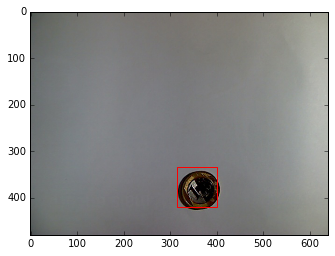

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154466.jpg


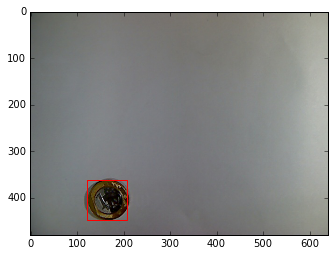

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154472.jpg


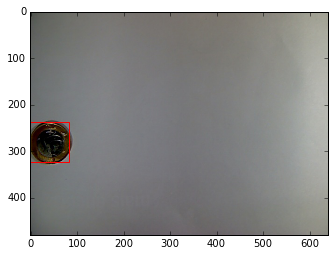

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154478.jpg


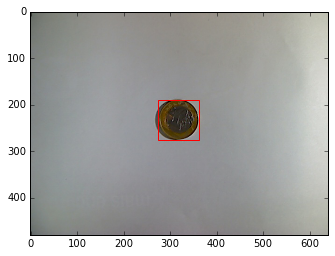

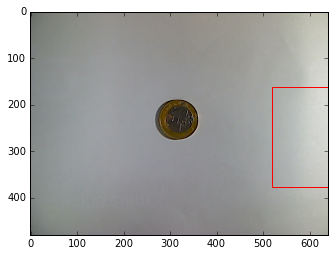

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154484.jpg


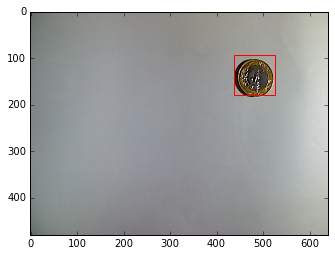

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154490.jpg


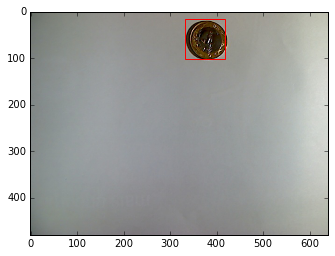

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154496.jpg


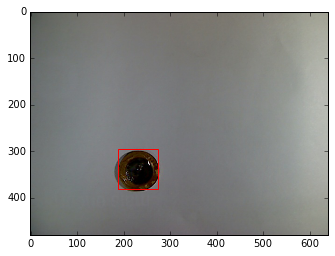

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154502.jpg


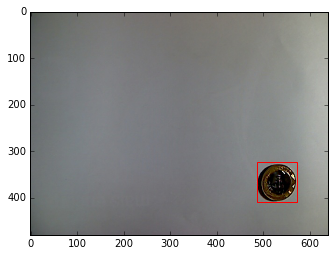

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154508.jpg


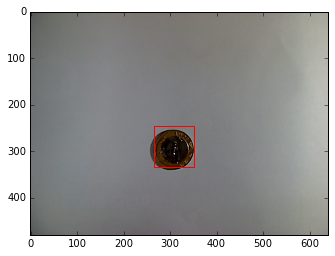

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154514.jpg


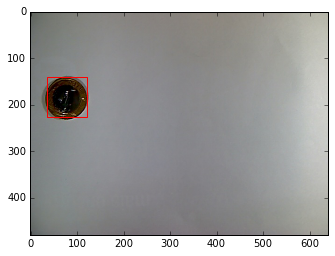

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154520.jpg


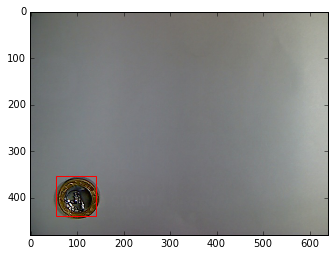

/media/maruf/resource2/kaggle/brazilian_coin/all/100_1477154526.jpg


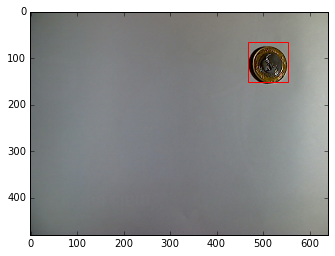

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286856.jpg


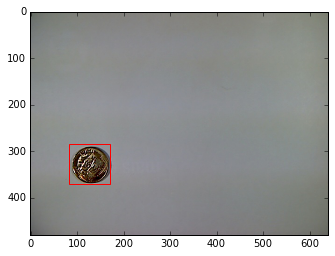

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286862.jpg


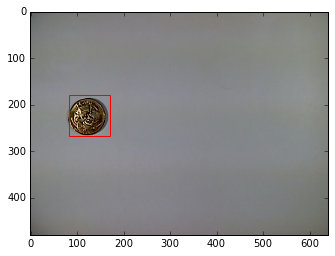

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286868.jpg


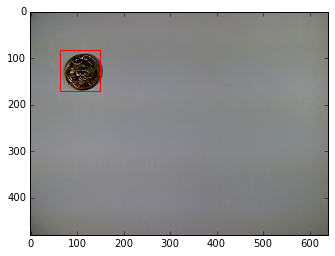

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286874.jpg


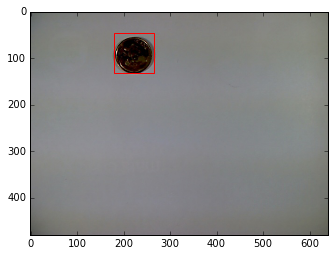

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286880.jpg


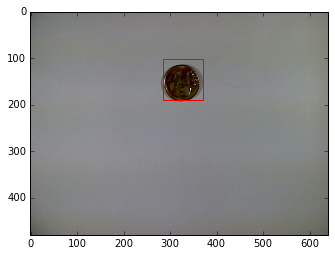

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286886.jpg


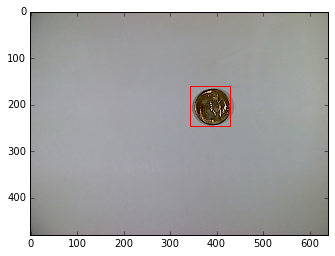

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286892.jpg


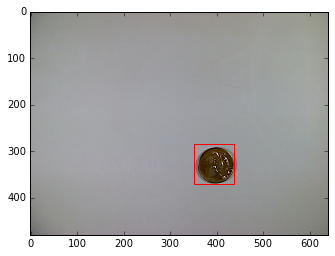

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286898.jpg


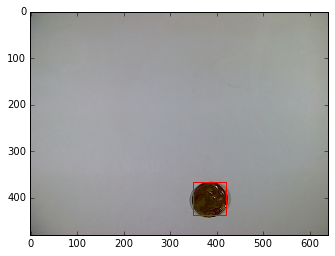

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286904.jpg


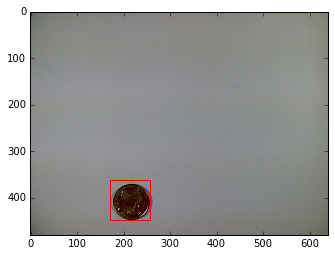

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286910.jpg


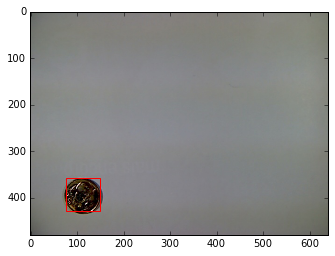

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286916.jpg


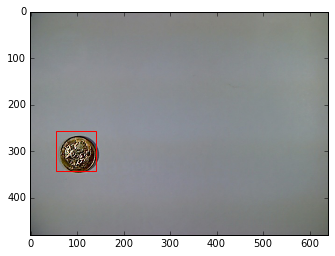

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286922.jpg


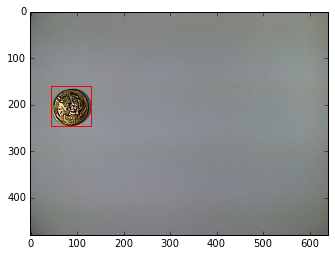

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286928.jpg


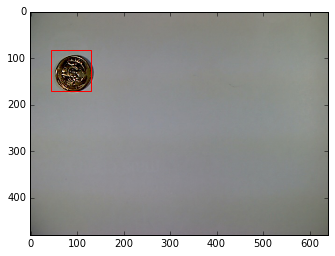

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286934.jpg


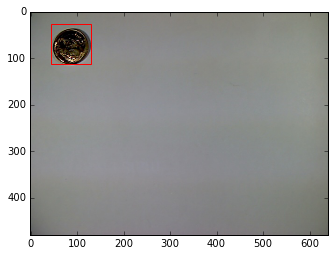

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286940.jpg


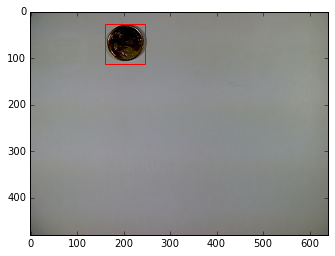

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286946.jpg


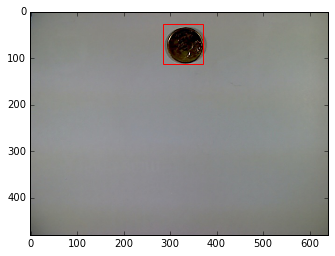

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286952.jpg


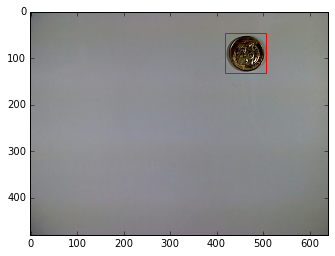

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286958.jpg


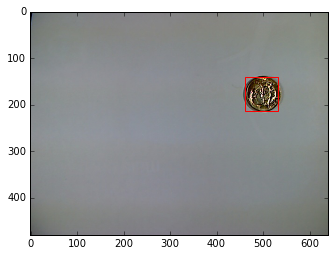

/media/maruf/resource2/kaggle/brazilian_coin/all/25_1477286964.jpg


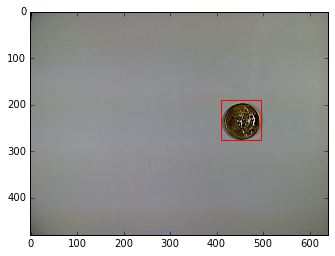

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477185516.jpg


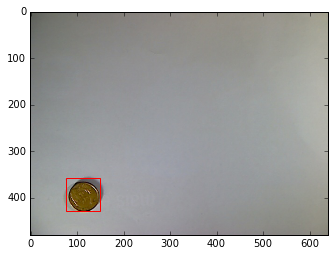

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477185522.jpg


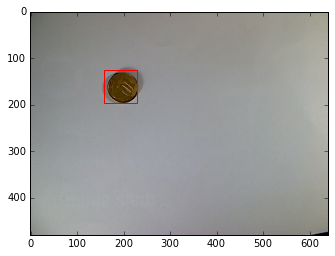

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477185528.jpg


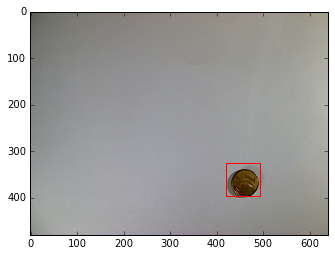

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477185534.jpg


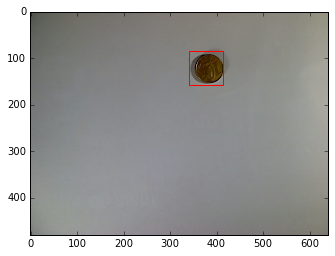

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477185540.jpg


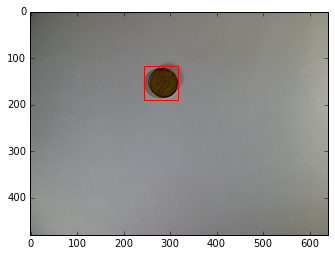

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477185546.jpg


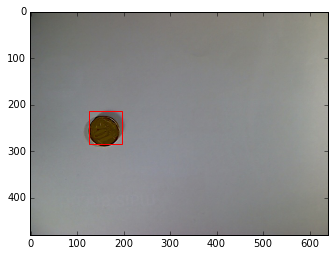

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477185552.jpg


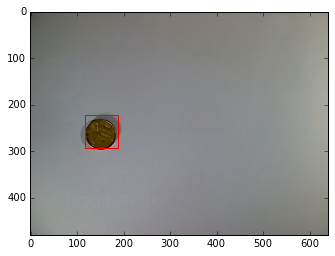

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477185558.jpg


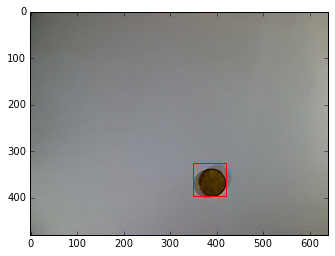

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477185564.jpg


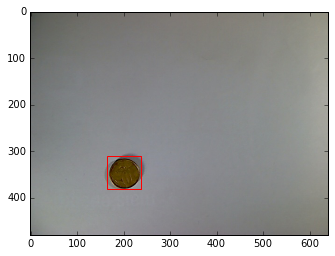

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477185570.jpg


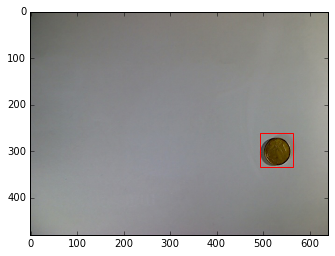

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477185576.jpg


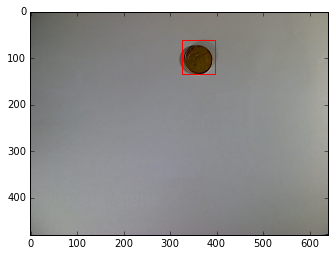

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477185582.jpg


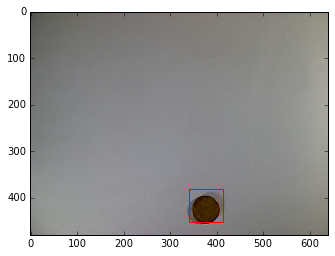

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477186218.jpg


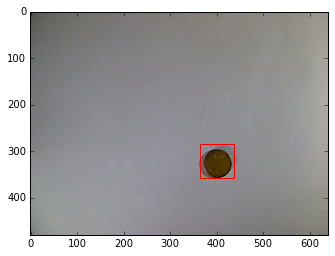

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477186224.jpg


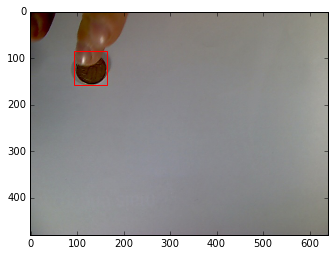

/media/maruf/resource2/kaggle/brazilian_coin/all/10_1477186230.jpg


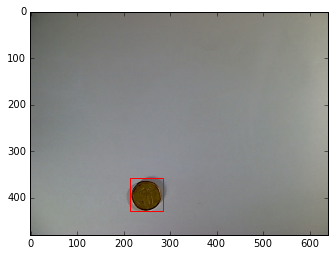

In [7]:
# localization
for n, coin in enumerate(coins[:50]):    
    img = plt.imread(coin)
    print coin
    dets = detector(img)    
    for k, d in enumerate(dets):
        left = d.left()
        top = d.top()
        width = d.right() - d.left()
        height = d.bottom() - d.top()        
        fig,ax = plt.subplots(1)
        ax.imshow(img)
        rect = patches.Rectangle((left, top),width, height,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)        
        plt.show()
        plt.figure(n)

As we can see, coin localization is not 100% accurate. May be we should increase training size. For classification purpose we need to localize and annotate these coins. We can use dlib to localize the quickly and create the annotation based on file name.

Is there any way to evaluate the localization without checking all images explicitly?

Let's do something funny. We will use the area of the rectangle as a feature. According to the spec, the distance between coins and camera is fixed.

In [8]:
values = []
areas = []
for n, coin in tqdm(enumerate(coins)):    
    img = plt.imread(coin)    
    value = ntpath.basename(coin).split('_')[0]    
    dets = detector(img)  
    if len(dets) > 0:
        d = dets[0]    
        left = d.left()
        top = d.top()
        width = d.right() - d.left()
        height = d.bottom() - d.top()        
        areas.append(width*height)
        values.append(value)        

3059it [02:24, 21.17it/s]


In [ ]:
# Now put all coin value and corresponding bounding box area in a dataframe for visualization purpose.

In [9]:
df = pd.DataFrame({'value': map(int, values), 'area': areas})

In [10]:
df.sample(10)

area  value
2097  7396     25
1284  5184     50
2100  7482     25
1851  7396     25
2914  5184      5
752   7569    100
2196  5184    100
660   5184     50
2013  5184     10
2541  7482     25

Let's see the average area of each type of coin.

/home/maruf/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


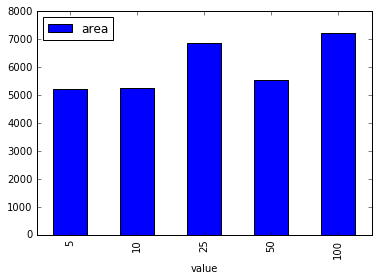

In [11]:
df.groupby('value').mean().sort().plot(kind='bar')

In [12]:
df.groupby('value').mean()

area
value             
5      5227.788333
10     5254.553897
25     6861.038017
50     5550.458658
100    7213.303777

Hmmm. We need more experiment in this area. Average area for coin 5 and 10 are almost same. Badluck :(
Can logistic regression help us? Let's see.

In [13]:
value_idx = {5:1, 10:2, 25:3, 50:4, 100:5}
df2 = df.copy()
df2.value = df2.value.map(value_idx)

In [14]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5)
X = df2.area
y = df2.value
model = LogisticRegression()

for train_index, test_index in kf.split(df2):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train = X_train.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test.reshape(-1, 1))
    acc_score = accuracy_score(y_pred, y_test)
    print acc_score

0.297385620915
0.333333333333
0.271241830065
0.325695581015
0.212765957447


/home/maruf/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/maruf/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/home/maruf/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/maruf/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


Very bad accuray. We should change the approach.

Let's move the coin image to different folder for caffe classification.

In [27]:
# localization
c = 0
for n, coin in enumerate(coins):    
    img = cv2.imread(coin)    
    dets = detector(img)    
    for k, d in enumerate(dets):
        xmin = d.left()
        ymin = d.top()
        xmax = d.right()
        ymax = d.bottom()
        coin_img = img[ymin:ymax, xmin:xmax]
        if xmax - xmin > 10 and ymax - ymin > 10 and xmin * ymin * xmax * ymax > 0:
            value = ntpath.basename(coin).split('_')[0]
            dest = '/media/maruf/resource2/kaggle/brazilian_coin/coins/%s/%d.jpg'%(value, c)
            c += 1
            cv2.imwrite(dest, coin_img)

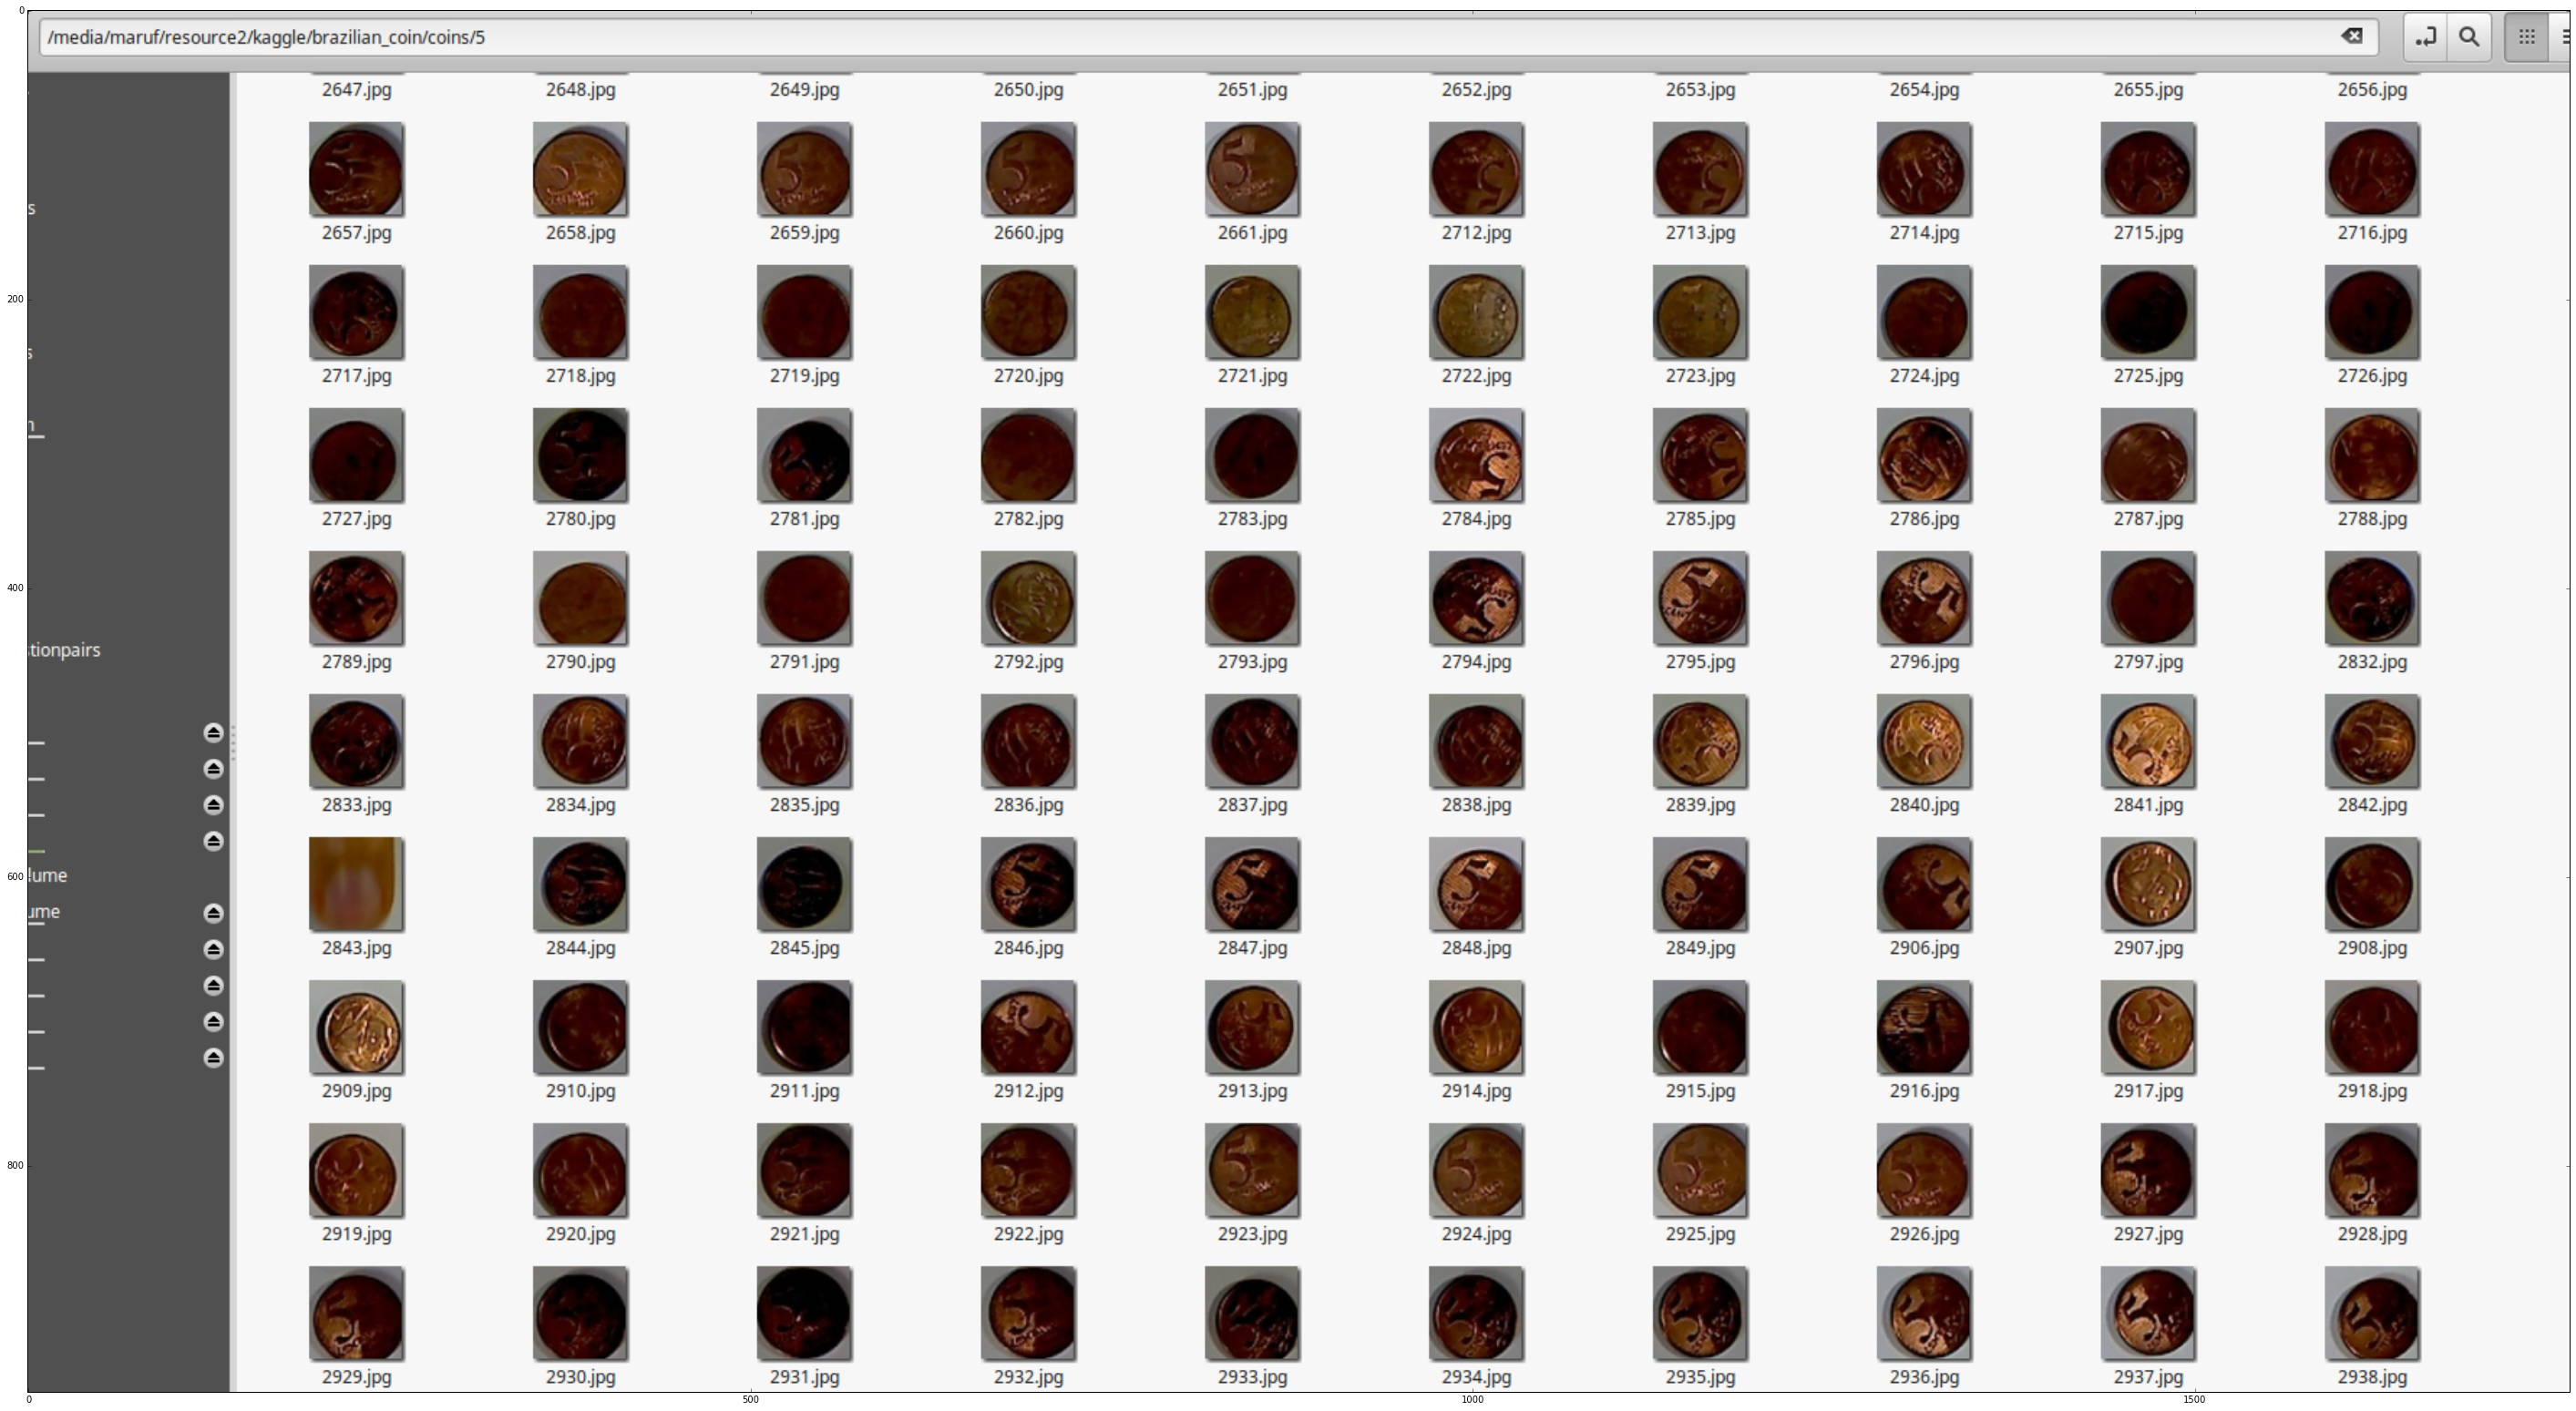

In [4]:
# Here is the screen shot of extracted coins
ss = plt.imread('/home/maruf/Desktop/Bcoins.png')
plt.figure(figsize=(50, 50))
plt.imshow(ss)

There are some outlier in each class. Finger image actually. Is there any way to detect those? Let's check. Recently, I've read about ROI Maxpooling in ConvNet. A rough idea is to split each bounding box to same number (N) of boxes and take the max pixel values from those. In this case we will get N length feature for each coin image. 


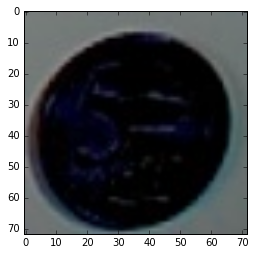

In [7]:
coin = cv2.imread('/media/maruf/resource2/kaggle/brazilian_coin/coins/5/2845.jpg')
plt.imshow(coin)